# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis

•Observable Trend 1: It is a known fact that the temperature increases as we approach the equator, thus making it “hot”.  The warmer the temperature reflects the more humid the cities displayed through the two plots (Latitude vs. Temperature and Latitude vs. Humidity). The cooler the temperatures, the lower the humidity. 

•Observable Trend 2: The lower temperatures displayed the furthest from the equator, thus making the climate colder as it appears to be the northern hemisphere. This may be due to the Earth’s tilt in the axis or a change in the axial tilt which is known as the obliquity. 

•Observable Trend 3:  The relationship showing in the City Latitude vs. Wind Speed does not display an overall relationship between the latitude and wind speeds. However, this plot does display some outliers and in the northern hemispheres there are few cities with over 10 (mph) of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from api_keys import api_key
#config


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Query URL
url= "http://api.openweathermap.org/data/2.5/weather?"
# url="http://api.openweathermap.org/data/2.5/forecast?id=d25b36ca37d204f4988f50538f74fa33"
# BEST WORKING query_url=f"{url}appid={api_key}&lat=139&lon=35"
# query_url=f"{url}lat=35&lon=139&appid={api_key}"
query_url=f"{url}appid={api_key}"
# query_url = f"{url}appid={api_key}&units={units}&q="
# units = "metric"

# api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# make a request for my url = request.get
response=requests.get(url).json()
response
print(query_url)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

http://api.openweathermap.org/data/2.5/weather?appid=d25b36ca37d204f4988f50538f74fa33


In [2]:
# make a request for my url = request.get
response=requests.get(query_url).json()

print (json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 22
    },
    "cod": 200,
    "coord": {
        "lat": 35,
        "lon": 139
    },
    "dt": 1564355301,
    "id": 1851632,
    "main": {
        "humidity": 90,
        "pressure": 1011,
        "temp": 302.04,
        "temp_max": 304.26,
        "temp_min": 300.37
    },
    "name": "Shuzenji",
    "sys": {
        "country": "JP",
        "id": 2003105,
        "message": 0.0084,
        "sunrise": 1564343427,
        "sunset": 1564393818,
        "type": 3
    },
    "timezone": 32400,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 202,
        "gust": 1.34,
        "speed": 0.89
    }
}


In [3]:
#Specify the URL
url= "http://api.openweathermap.org/data/2.5/weather?"
#Make the request and store response
response=requests.get(query_url)
#Print Status code
print(response.ok)

True


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lng = []
cities = []
new_lats=[]
new_longs=[]
countries= []
temp=[]




# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
# len(cities)

print(f"The latitude information received is: {lat_lng}")
print(f"The temperature information received is: {temp}")





The latitude information received is: (-56.62168895892662, 147.4394543157298)
The temperature information received is: []


In [5]:
# Print the city count to confirm sufficient count
len(cities)



626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
#Url for open weather API Key
# url= "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="
# query_url
#Create an empty list to store the responses
response_json= []
#Create an empty list for holding required items
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]


#create a counter for each random city and count eacher request in set of 50
record=1
set_counter =1

# Make a request for each random city with a counter that resets at 50 and sub counter
# for x in range (len(cities)):
#     print(f"Processing Record: {record_counter}of Set {set_counter}| {cities[x]}")

# test_cities=["london","atlanta","austin"]

#print beginning Data Retrieval and another sperating '--'line
print (f"Beginning Data Retrieval")
print (f"------------------------------")

#Loop through the list of cities 
for city in cities: 
# for city in test_cities:
    try:
        response = requests.get(f"{query_url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
#     number = number + 1
     
     
    
 # Increase counter by one 
        record= record + 1
        
 # Wait a second in loop to not over exceed rate limit of API
#         time.sleep(1.00)
   
 #If no record found skip to next call
    except:
        print("City not found.Skipping....")
#     print(50 *"-")
#     print('End of Records')
   
#   print(f"The latitude information received is: {lat}")
#      print(f"The temperature information received is: {temp}")
    




        





Beginning Data Retrieval
------------------------------
Processing Record 1 | Hilo
Processing Record 2 | Ajdabiya
Processing Record 3 | Kapaa
Processing Record 4 | Atuona
Processing Record 5 | Port Augusta
Processing Record 6 | Miles City
Processing Record 7 | Codrington
Processing Record 8 | Vaini
Processing Record 9 | Mataura
Processing Record 10 | Nikolskoye
Processing Record 11 | Vestmannaeyjar
Processing Record 12 | Puerto Ayora
Processing Record 13 | Hobart
Processing Record 14 | Flinders
Processing Record 15 | Jamestown
Processing Record 16 | Tasiilaq
Processing Record 17 | Ambilobe
Processing Record 18 | Esso
Processing Record 19 | Coos Bay
Processing Record 20 | Cape Town
Processing Record 21 | Notre-Dame-du-Lac
Processing Record 22 | Lagoa
Processing Record 23 | Faanui
Processing Record 24 | Longyearbyen
Processing Record 25 | Barrow
Processing Record 26 | Shenjiamen
Processing Record 27 | Casian
Processing Record 28 | Sao Filipe
Processing Record 29 | Juneau
Processing Recor

Processing Record 229 | Hokitika
Processing Record 230 | Qaanaaq
Processing Record 231 | Isangel
Processing Record 232 | Kununurra
Processing Record 233 | Vila Velha
Processing Record 234 | Marzuq
Processing Record 235 | Karwar
Processing Record 236 | Camopi
Processing Record 237 | Mecca
Processing Record 238 | Motygino
Processing Record 239 | Leh
City not found.Skipping....
Processing Record 240 | Uttarkashi
Processing Record 241 | Ponta do Sol
Processing Record 242 | Norman Wells
Processing Record 243 | Japura
Processing Record 244 | Lata
Processing Record 245 | Grand-Santi
City not found.Skipping....
Processing Record 246 | Sterling
Processing Record 247 | Cassilandia
Processing Record 248 | Guerrero Negro
Processing Record 249 | Grindavik
City not found.Skipping....
Processing Record 250 | Grand Gaube
Processing Record 251 | Santa catarina de Tepehuanes
Processing Record 252 | Luderitz
Processing Record 253 | Sabha
Processing Record 254 | Knysna
Processing Record 255 | Conceicao do

Processing Record 452 | Barcelona
Processing Record 453 | Madingou
City not found.Skipping....
Processing Record 454 | Hutchinson
Processing Record 455 | Lamar
Processing Record 456 | Ihlow
Processing Record 457 | Ledyard
Processing Record 458 | Evanston
Processing Record 459 | Santa Cruz del Norte
Processing Record 460 | Dicabisagan
Processing Record 461 | Vostok
Processing Record 462 | Paita
City not found.Skipping....
Processing Record 463 | Northam
Processing Record 464 | San Quintin
Processing Record 465 | Gualaceo
Processing Record 466 | Burnie
Processing Record 467 | Aleksandrovsk-Sakhalinskiy
Processing Record 468 | Camara de Lobos
Processing Record 469 | Bangkalan
Processing Record 470 | Danielskuil
Processing Record 471 | Beni Mazar
City not found.Skipping....
Processing Record 472 | Rio Gallegos
Processing Record 473 | Talakan
Processing Record 474 | Langenburg
City not found.Skipping....
Processing Record 475 | Nimaparha
Processing Record 476 | Lavrentiya
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
#Create a dictionary with the lists generated  
weatherpy_dict= {
    "City": city_name, 
    "Cloudiness":cloudiness,
    "Country":country, 
    "Humidity": humidity, 
    "Lat":lat,
    "Lng":lng,
    "Wind Speed": wind_speed,
    "Max_Temp": max_temp
}
#Create a dataframe from dictionary 
weather_data_df=pd.DataFrame(weatherpy_dict)
#Display count of weather values
weather_data_df.count()

City          561
Cloudiness    561
Country       561
Humidity      561
Lat           561
Lng           561
Wind Speed    561
Max_Temp      561
dtype: int64

In [33]:
#Save DataFrame to CSV
weather_data_df.to_csv('weather_data_df.csv')

#Display DataFrame
weather_data_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Wind Speed,Max_Temp
0,Hilo,1,US,62,19.71,-155.08,3.60,302.150
1,Ajdabiya,0,LY,57,30.75,20.22,3.41,300.522
2,Kapaa,40,US,70,22.08,-159.32,6.70,302.150
3,Atuona,0,PF,73,-9.80,-139.03,8.29,300.122
4,Port Augusta,90,AU,87,-32.49,137.76,2.60,286.150


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

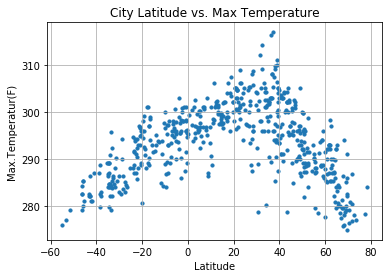

In [37]:
# #Build a scatter plot latitude vs temperature and save figure as .png
plt.scatter(weather_data_df["Lat"],weather_data_df["Max_Temp"],marker="o", s=10)
# #Incorportate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max.Temperatur(F)")
plt.xlabel("Latitude")
plt.grid(True)

# #Save the figure
plt.savefig("CityLat_temp.png")
# #Show Plot
plt.show()

#### Latitude vs. Humidity Plot

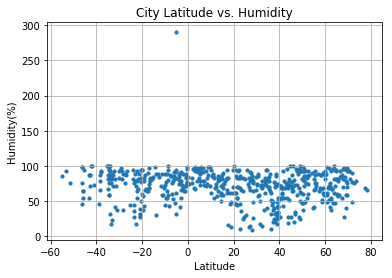

In [38]:
# #Build a scatter plot lattitude vs. Humidity plot
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"],marker="o", s=10)

# #Incorportate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# #Save the figure
plt.savefig("Lat_Humidity.png")

# #Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

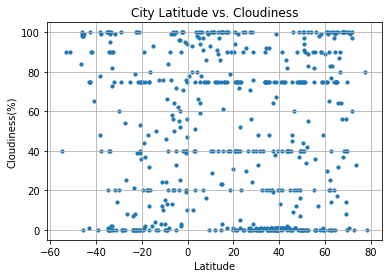

In [39]:
# #Build a scatter plot lattitude vs. Cloudiness plot
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"],marker="o", s=10)

# #Incorportate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# #Save the figure
plt.savefig("Lat_Cloudiness.png")

# #Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

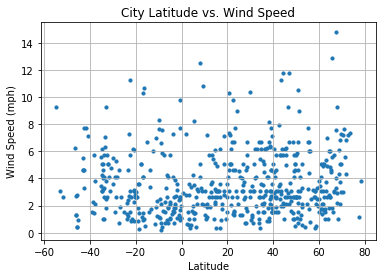

In [40]:
# #Build a scatter plot lattitude vs. Windspeed plot
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"],marker="o", s=10)

# #Incorportate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# #Save the figure
plt.savefig("Lat_WindSpeed.png")

# #Show Plot
plt.show()